In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.model_selection import train_test_split

In [2]:
file_path = 'E:\Sem6 Mini Project\ML\DynamicPricing\FinalDatasetDynamicPricing.csv'
data = pd.read_csv(file_path)
data.head()


,username,service_provider_username,service,price,no_of_pages,topic,date,deadline
0,user1,provider1,App,3500,6,Topic1,2024-03-04,2024-03-05
1,user2,provider2,PPT,575,17,Topic2,2024-03-25,2024-04-04
2,user3,provider3,Frontend,1975,16,Topic3,2024-03-27,2024-04-10
3,user4,provider4,Figma,800,4,Topic4,2024-03-19,2024-04-01
4,user5,provider5,Docs,200,12,Topic5,2024-03-13,2024-03-27


In [3]:
columns_to_keep = ['username', 'service_provider_username', 'service', 'price', 'no_of_pages', 'topic','date', 'deadline']
data = data[columns_to_keep].dropna()
data.head()



,username,service_provider_username,service,price,no_of_pages,topic,date,deadline
0,user1,provider1,App,3500,6,Topic1,2024-03-04,2024-03-05
1,user2,provider2,PPT,575,17,Topic2,2024-03-25,2024-04-04
2,user3,provider3,Frontend,1975,16,Topic3,2024-03-27,2024-04-10
3,user4,provider4,Figma,800,4,Topic4,2024-03-19,2024-04-01
4,user5,provider5,Docs,200,12,Topic5,2024-03-13,2024-03-27


In [4]:
y=data['price']
features=['service','no_of_pages','date','deadline']
X=data[features]
X.describe()

,no_of_pages
count,10000.000000
mean,8.872900
std,5.485486
min,1.000000
25%,4.000000
50%,7.000000
75%,13.000000
max,20.000000


In [5]:
data['date'] = pd.to_datetime(data['date'])
data['deadline'] = pd.to_datetime(data['deadline'])
data['days']=data['deadline']-data['date']



In [6]:
data.drop(['date','deadline'],axis=1,inplace=True)

In [7]:
data.drop(['username','service_provider_username'],axis=1,inplace=True)

In [8]:
data['days']=data['days'].dt.days
data.head()


,service,price,no_of_pages,topic,days
0,App,3500,6,Topic1,1
1,PPT,575,17,Topic2,10
2,Frontend,1975,16,Topic3,14
3,Figma,800,4,Topic4,13
4,Docs,200,12,Topic5,14


In [9]:
data.drop(['topic'],axis=1,inplace=True)

In [10]:
data

,service,price,no_of_pages,days
0,App,3500,6,1
1,PPT,575,17,10
2,Frontend,1975,16,14
3,Figma,800,4,13
4,Docs,200,12,14
...,...,...,...,...
9995,PPT,800,16,5
9996,Frontend,2000,1,8
9997,App,3025,7,11
9998,Figma,700,6,15


In [11]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
y=data['price']
features=['service','no_of_pages','days']
X=data[features]
X.describe()
OrdinalEncoder=OrdinalEncoder()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

lable_X_train=X_train.copy()
lable_X_test=X_test.copy()

lable_X_train[['service']]=OrdinalEncoder.fit_transform(X_train[['service']])
lable_X_test[['service']]=OrdinalEncoder.transform(X_test[['service']])

model=RandomForestRegressor(n_estimators=100,random_state=0)
print(lable_X_train)
print(lable_X_test)


      service  no_of_pages  days
2414      5.0            6     4
9734      4.0            4     4
2086      6.0            7     3
7320      2.0           13     7
187       4.0            5     8
...       ...          ...   ...
2849      3.0            6     5
8123      6.0            5     1
285       5.0            3     1
8549      5.0            6    13
2924      5.0           15    12

[8000 rows x 3 columns]
      service  no_of_pages  days
9884      0.0            5    14
8224      3.0            8    13
7951      4.0           11    14
4051      5.0            1    10
9545      1.0            4    13
...       ...          ...   ...
8428      4.0           13    13
4398      3.0            9    14
8791      6.0            6    11
2783      5.0           14     5
5089      4.0            3     8

[2000 rows x 3 columns]


In [12]:
from sklearn.metrics import mean_absolute_error
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    return mean_absolute_error(y_test,preds)    

In [13]:
# get_score(model,lable_X_train,lable_X_test,y_train,y_test)

In [14]:
# from sklearn.metrics import mean_squared_error
# model.fit(lable_X_train,y_train)
# preds=model.predict(lable_X_test)

# accuracy=mean_squared_error(y_test,preds)
# accuracy

In [15]:
# from sklearn.metrics import r2_score
# r2=r2_score(y_test,preds)
# r2

In [16]:
# new_data = {
#     "service":0,
#     "no_of_pages":10,
#     "days":9,
# }

# input_data_as_numpy_array = np.array([
#     new_data["service"],new_data["no_of_pages"], new_data["days"]
# ]).reshape(1, -1)

# prediction = model.predict(input_data_as_numpy_array)
# print("Predicted Price:", prediction[0])


In [17]:
#import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the models
models = {
    # "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(),
    # "DecisionTreeRegressor": DecisionTreeRegressor(),
    # "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    # "BaggingRegressor": BaggingRegressor(),
    # "ExtraTreesRegressor": ExtraTreesRegressor()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    model_metrics = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_score = model.score(X_test, y_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        model_scores[name] = r2_score
        model_metrics[name] = {
            "R2": r2_score,
            "MSE": mse,
            "MAE": mae,
            "RMSE": rmse
        }
        
    return model_scores, model_metrics

model_scores, model_metrics = fit_and_score(models=models, X_train=lable_X_train, X_test=lable_X_test, y_train=y_train, y_test=y_test)

model_scores
model_metrics


{'RandomForestRegressor': {'R2': 0.9999957261060468,
  'MSE': 3.87396875,
  'MAE': 0.458125,
  'RMSE': 1.9682400133113847},
 'KNeighborsRegressor': {'R2': 0.9494396142317337,
  'MSE': 45829.25,
  'MAE': 93.24,
  'RMSE': 214.07767281993702},
 'GradientBoostingRegressor': {'R2': 0.9986548385580024,
  'MSE': 1219.2893523047217,
  'MAE': 25.83206210214155,
  'RMSE': 34.918324019126715},
 'AdaBoostRegressor': {'R2': 0.8846315371561042,
  'MSE': 104572.97833963722,
  'MAE': 243.68183169522857,
  'RMSE': 323.37745490314757}}

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Function to discretize the target variable
def discretize(y, bins):
    return np.digitize(y, bins)

# Function to fit and score models, including confusion matrices
def fit_and_score(models, X_train, X_test, y_train, y_test, bins):
    model_scores = {}
    model_metrics = {}
    confusion_matrices = {}
    
    # Discretize the target variable
    y_train_discretized = discretize(y_train, bins)
    y_test_discretized = discretize(y_test, bins)
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate regression metrics
        r2_score = model.score(X_test, y_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        # Discretize predictions
        y_pred_discretized = discretize(y_pred, bins)
        
        # Create confusion matrix
        cm = confusion_matrix(y_test_discretized, y_pred_discretized)
        
        model_scores[name] = r2_score
        model_metrics[name] = {
            "R2": r2_score,
            "MSE": mse,
            "MAE": mae,
            "RMSE": rmse
        }
        confusion_matrices[name] = cm
        
    return model_scores, model_metrics, confusion_matrices

# Define the bins for discretizing the target variable
bins = np.linspace(min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max()), 10)

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined
model_scores, model_metrics, confusion_matrices = fit_and_score(models=models, X_train=lable_X_train, X_test=lable_X_test, y_train=y_train, y_test=y_test, bins=bins)

# Display results
print("Model Scores:")
print(model_scores)
print("\nModel Metrics:")
print(pd.DataFrame(model_metrics))
print("\nConfusion Matrices:")
for model_name, cm in confusion_matrices.items():
    print(f"\n{model_name}:\n", cm)


Model Scores:
{'RandomForestRegressor': 0.9999956377094243, 'KNeighborsRegressor': 0.9494396142317337, 'GradientBoostingRegressor': 0.9986548385580024, 'AdaBoostRegressor': 0.8869892990365952}

Model Metrics:
      RandomForestRegressor  KNeighborsRegressor  GradientBoostingRegressor  \
R2                 0.999996             0.949440                   0.998655   
MSE                3.954094         45829.250000                1219.289352   
MAE                0.502875            93.240000                  25.832062   
RMSE               1.988490           214.077673                  34.918324   

      AdaBoostRegressor  
R2             0.886989  
MSE       102435.841587  
MAE          240.827436  
RMSE         320.055998  

Confusion Matrices:

RandomForestRegressor:
 [[418   0   0   0   0   0   0   0   0   0]
 [  0 218   0   0   0   0   0   0   0   0]
 [  0   0 138   0   0   0   0   0   0   0]
 [  0   0   0 138   0   0   0   0   0   0]
 [  0   0   0   0 268   0   0   0   0   0]
 [  

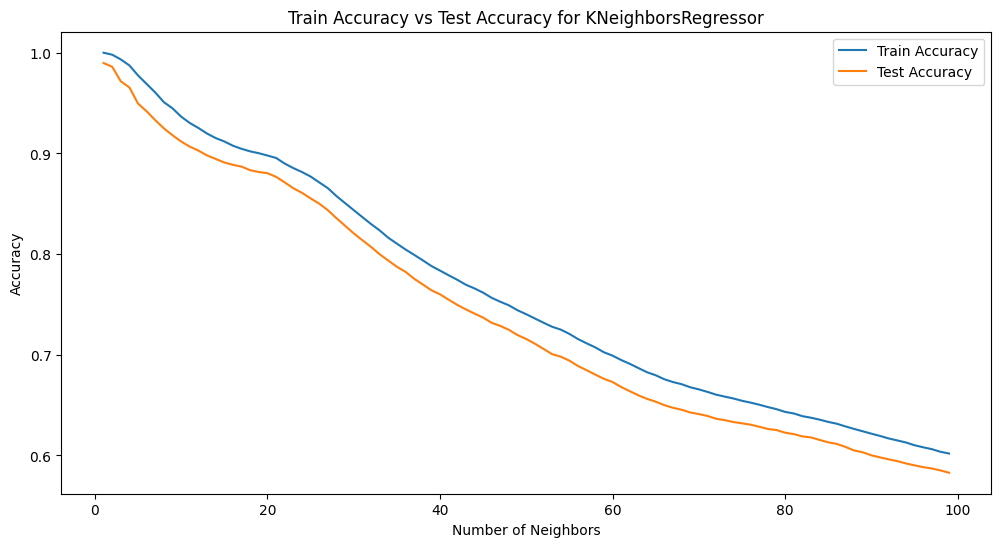

In [20]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


train_accuracy = []
test_accuracy = []

for k in range(1, 100):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_accuracy, label="Train Accuracy")
plt.plot(range(1, 100), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for KNeighborsRegressor")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [21]:
#for ada boost
#Train and Test Accuracy
from sklearn.ensemble import AdaBoostRegressor


train_accuracy = []
test_accuracy = []

# Building the model with different n_estimators values
for n in range(1, 100):
    model = AdaBoostRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

# Plotting the train vs test accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_accuracy, label="Train Accuracy")
plt.plot(range(1, 100), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for AdaBoostRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



KeyboardInterrupt: 

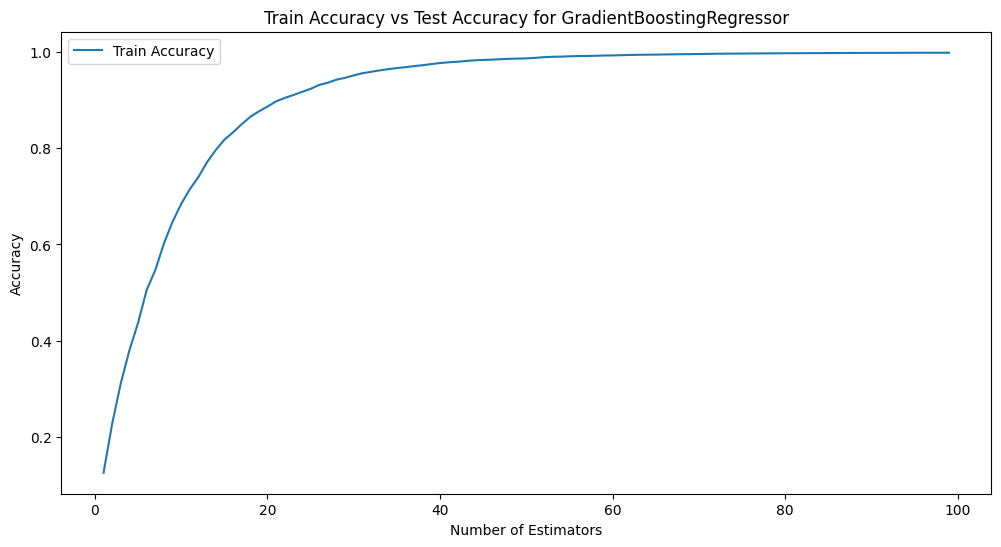

In [ ]:
#Train and Test Accuracy for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

train_accuracy = []
test_accuracy = []

# Building the model with different n_estimators values
for n in range(1, 100):
    model = GradientBoostingRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

# Plotting the train vs test accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_accuracy, label="Train Accuracy")
plt.plot(range(1, 100), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for GradientBoostingRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



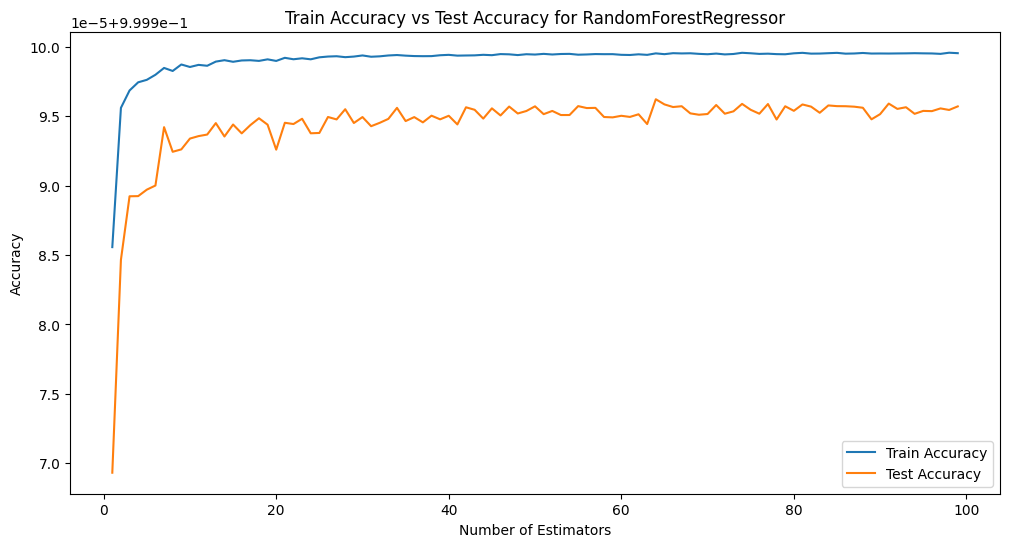

In [22]:
from sklearn.ensemble import RandomForestRegressor


train_accuracy = []
test_accuracy = []


for n in range(1, 100):
    model = RandomForestRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_accuracy, label="Train Accuracy")
plt.plot(range(1, 100), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for RandomForestRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


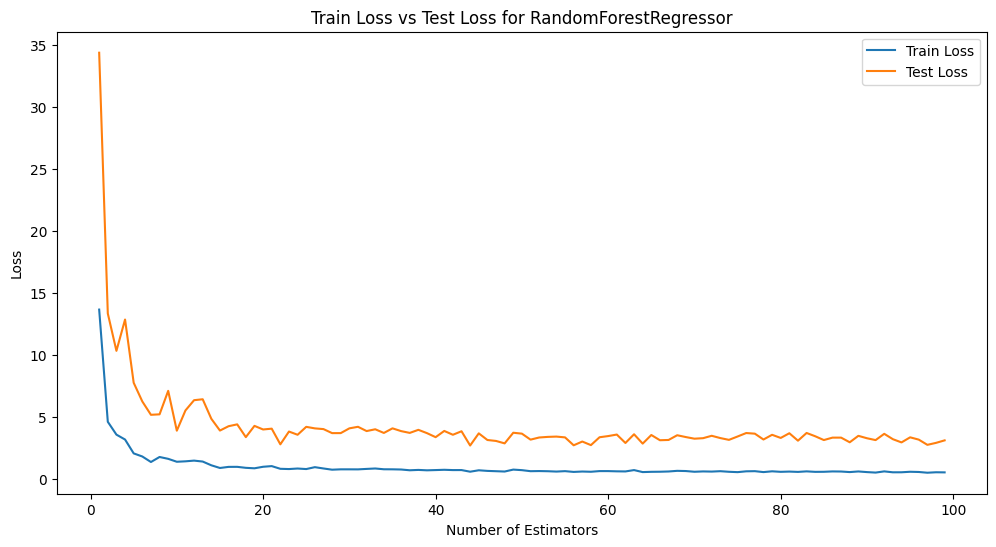

In [ ]:
#Model loss for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

train_loss = []
test_loss = []

# Building the model with different n_estimators values
for n in range(1, 100):
    model = RandomForestRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_loss.append(mean_squared_error(y_train, model.predict(lable_X_train)))
    test_loss.append(mean_squared_error(y_test, model.predict(lable_X_test)))

# Plotting the train vs test loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_loss, label="Train Loss")
plt.plot(range(1, 100), test_loss, label="Test Loss")
plt.title("Train Loss vs Test Loss for RandomForestRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Loss")
plt.legend()    
plt.show()





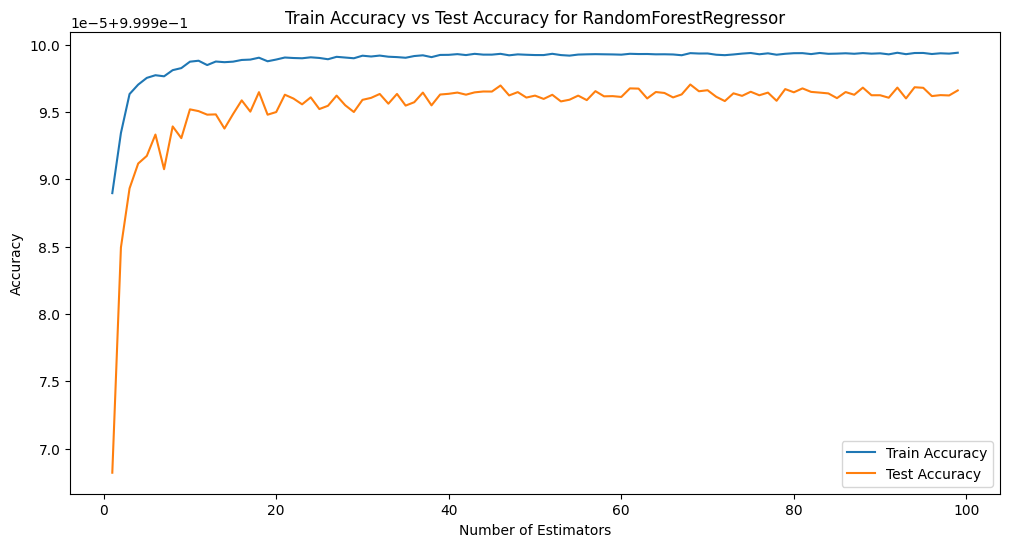

In [ ]:

from sklearn.ensemble import RandomForestRegressor


train_accuracy = []
test_accuracy = []

# Building the model with different n_estimators values
for n in range(1, 100):
    model = RandomForestRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

# Plotting the train vs test accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_accuracy, label="Train Accuracy")
plt.plot(range(1, 100), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for RandomForestRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


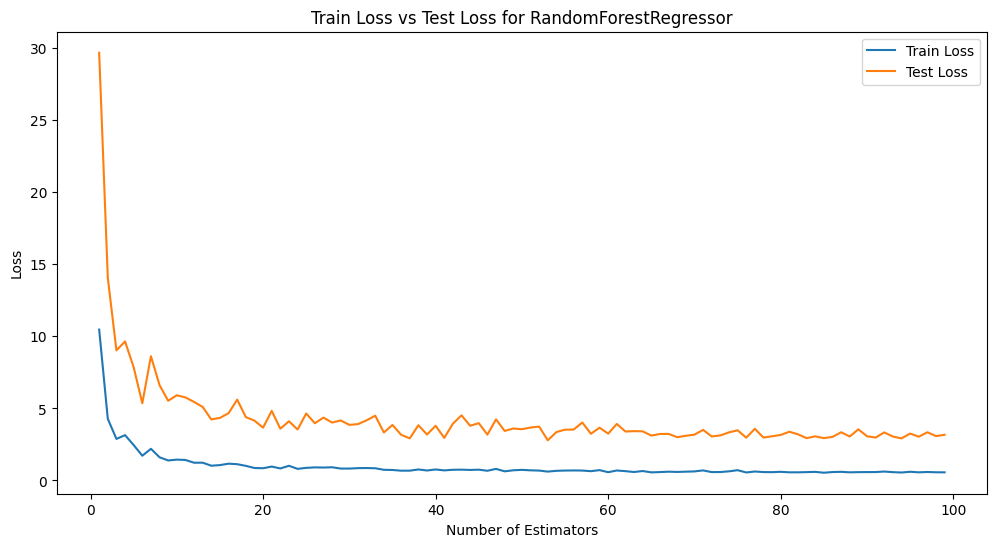

In [ ]:
#Model loss for Random Forest using epochs
from sklearn.ensemble import RandomForestRegressor

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

train_loss = []
test_loss = []

# Building the model with different n_estimators values
for n in range(1, 100):
    model = RandomForestRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_loss.append(mean_squared_error(y_train, model.predict(lable_X_train)))
    test_loss.append(mean_squared_error(y_test, model.predict(lable_X_test)))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_loss, label="Train Loss")
plt.plot(range(1, 100), test_loss, label="Test Loss")
plt.title("Train Loss vs Test Loss for RandomForestRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Loss")
plt.legend()
plt.show()



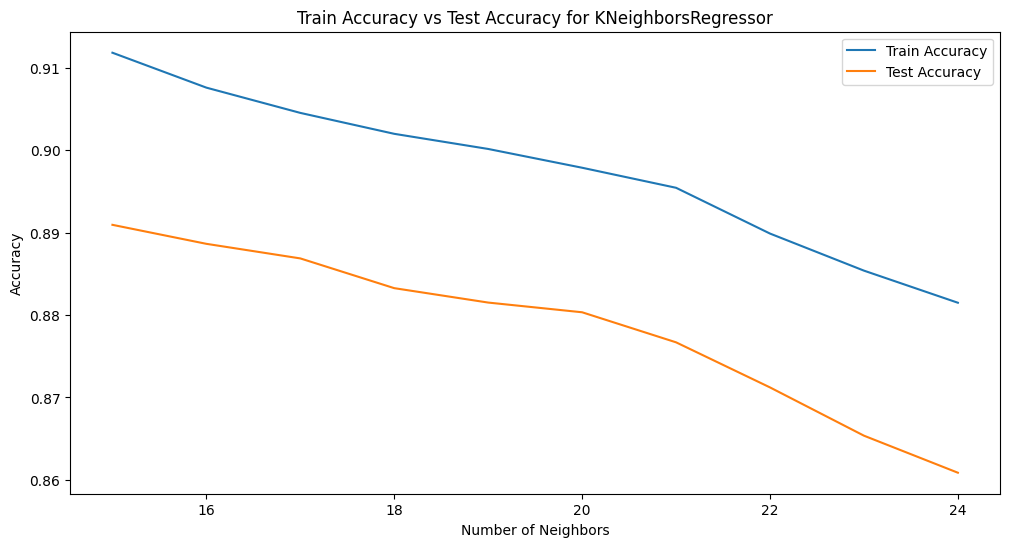

In [23]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


train_accuracy = []
test_accuracy = []

for k in range(15, 25):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(15,25), train_accuracy, label="Train Accuracy")
plt.plot(range(15,25), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for KNeighborsRegressor")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



#for ada boost





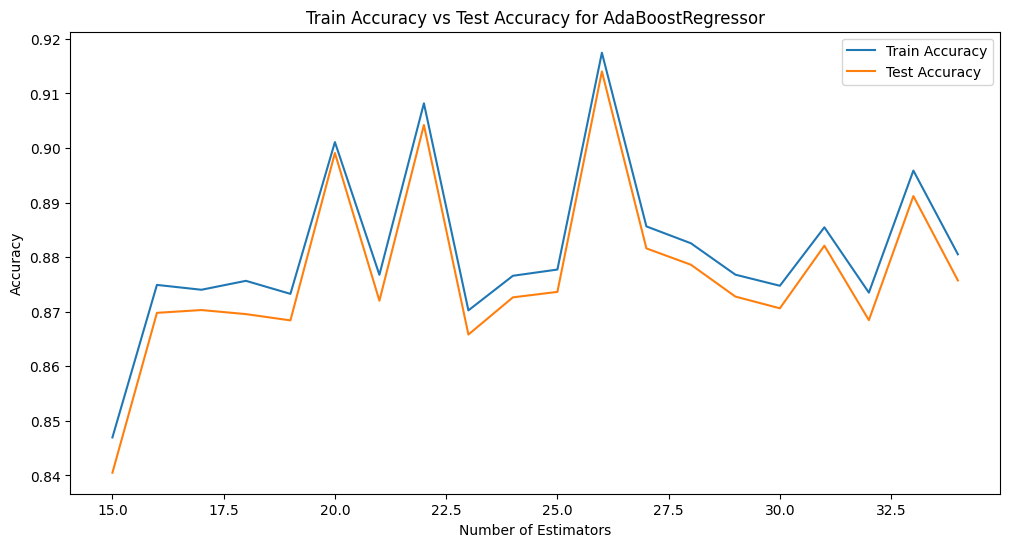

In [26]:
#Train and Test Accuracy
from sklearn.ensemble import AdaBoostRegressor


train_accuracy = []
test_accuracy = []

# Building the model with different n_estimators values
for n in range(15, 35):
    model = AdaBoostRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

# Plotting the train vs test accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(15,35), train_accuracy, label="Train Accuracy")
plt.plot(range(15,35), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for AdaBoostRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

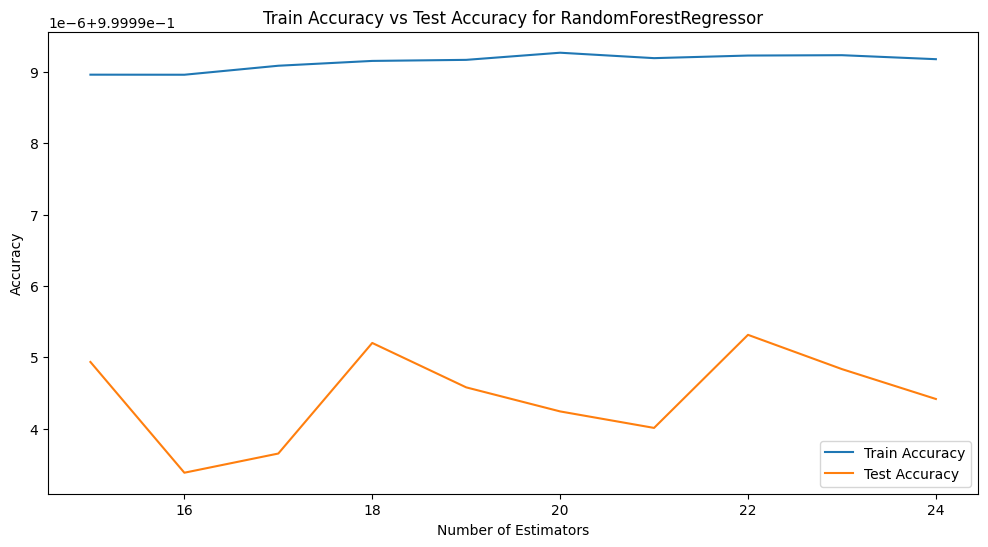

In [25]:

from sklearn.ensemble import RandomForestRegressor


train_accuracy = []
test_accuracy = []


for n in range(15,25):
    model = RandomForestRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(15,25), train_accuracy, label="Train Accuracy")
plt.plot(range(15,25), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for RandomForestRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()